In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
num_classes = len(np.unique(y))
print(num_classes)

3


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_proba(X, weights):
    return sigmoid(np.dot(X, weights))

In [ ]:
weights = []
learning_rate = 0.01
num_iterations = 1000
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add bias term

for class_label in range(num_classes):
    y_binary = (y_train == class_label).astype(int)
    weight = np.zeros(X_train_bias.shape[1])

    for _ in range(num_iterations):
        predictions = predict_proba(X_train_bias, weight)
        error = y_binary - predictions
        gradient = np.dot(X_train_bias.T, error)
        weight += learning_rate * gradient  # Update weights

    weights.append(weight)
weights = np.array(weights)

In [ ]:
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add bias term
probs = sigmoid(np.dot(X_test_bias, weights.T))
y_pred = np.argmax(probs, axis=1)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8666666666666667


Information Gain for Outlook: 0.24674981977443933
Information Gain for Temperature: 0.1181591726472786
Information Gain for Humidity: 0.15183550136234159
Information Gain for Windy: 0.04812703040826949


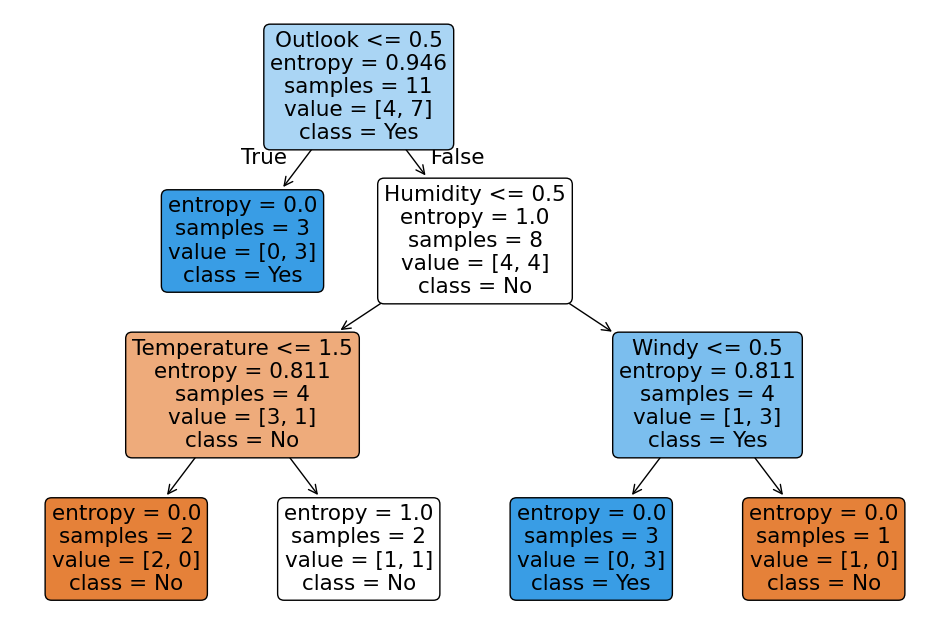

In [ ]:
# Q2 answer

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild', 'Mild', 'Hot', 'Mild', 'Mild', 'Hot', 'Mild', 'Cool'],
    'Humidity': ['High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'High', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

def entropy(y):
    value_counts = y.value_counts()
    probabilities = value_counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    feature_values = data[feature].unique()
    weighted_entropy = 0

    for value in feature_values:
        subset = data[data[feature] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])

    return total_entropy - weighted_entropy


target = 'Play'
features = df.columns[:-1]

for feature in features:
    ig = information_gain(df, feature, target)
    print(f'Information Gain for {feature}: {ig}')


label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


X = df.drop('Play', axis=1)
y = df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)
model.fit(X_train, y_train)


plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=label_encoders['Play'].classes_, filled=True, rounded=True)
plt.show()

In [ ]:
# Q3 answer

import pandas as pd

# Load the CSV file to examine the dataset
file_path = 'BankNote_Authentication.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = data.drop(columns=['class'])
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

y_pred = cart_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.9805825242718447,
 '              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98       229\n           1       0.99      0.97      0.98       183\n\n    accuracy                           0.98       412\n   macro avg       0.98      0.98      0.98       412\nweighted avg       0.98      0.98      0.98       412\n')